Instruções
- Resolver as questões abaixo. Subir o notebook em um repositório público no GitHub e enviar no [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform)
- Para resolver as questões abaixo utilizar o dataset do seaborn: 'mpg'
- Para os gráficos finais de cada questão, eles devem possuir título, rótulo dos eixos definidos e legenda (quando necessário).

#### Questão 1

Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [ ]:
#importando as bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#baixando e visualizando o dataset
car = sns.load_dataset('mpg')
car.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [ ]:
#verificando se há valores nulos
car.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
#deletando as linhas com valores nulos
car = car.dropna()

In [ ]:
#verificando se os valores nulos foram deletados
car.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
#verificando a quantidade de registros e colunas
car.shape

(392, 9)

#### Questão 2

Qual a quantidade de carros por origem (*origin*)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

In [ ]:
#quantidade de carros por origem
car['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [ ]:
#Definindo x e y pro gráfico
x = car['origin'].value_counts().index
y = car['origin'].value_counts().values

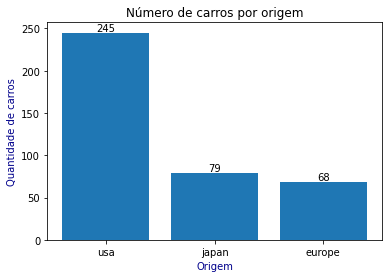

In [ ]:
#plotando o gráfico 
fig , ax = plt.subplots()
bars = ax.bar(x, y)
ax.set_title('Número de carros por origem')
ax.set_xlabel('Origem', color = 'darkblue')
ax.set_ylabel('Quantidade de carros', color = 'darkblue')
ax.bar_label(bars);

In [ ]:
!pip install matplotlib==3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.1 MB/s 
     |████████████████████████████████| 965 kB 36.9 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


#### Questão 3

Qual a média da potência (*horsepower*) dos carros por origem?

In [ ]:
#calculando a média de potência por origem
car.groupby('origin')['horsepower'].mean()

origin
europe     80.558824
japan      79.835443
usa       119.048980
Name: horsepower, dtype: float64

In [ ]:
x = car.groupby('origin')['horsepower'].mean().index
y = car.groupby('origin')['horsepower'].mean().values

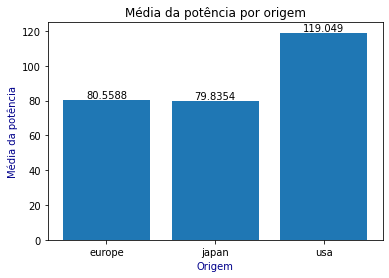

In [ ]:
#plotando o gráfico 
fig , ax = plt.subplots()
bars = ax.bar(x, y)
ax.set_title('Média da potência por origem')
ax.set_xlabel('Origem', color = 'darkblue')
ax.set_ylabel('Média da potência', color = 'darkblue')
ax.bar_label(bars);

#### Questão 4

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) cos carros?

Text(0, 0.5, 'Aceleração')

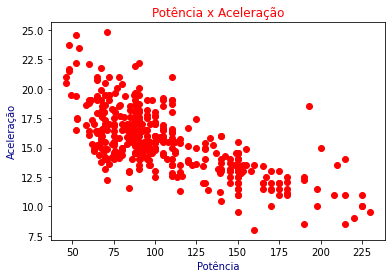

In [ ]:
#plotando o gráfico 
fig , ax = plt.subplots()
bars = ax.scatter(data = car, x = 'horsepower', y = 'acceleration', color = 'r')
ax.set_title('Potência x Aceleração', c = 'r')
ax.set_xlabel('Potência', color = 'darkblue')
ax.set_ylabel('Aceleração', color = 'darkblue')

#### Questão 5

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros, segmentando de acordo com a origem (*origin*) com cores diferentes e plotando no mesmo eixo (*axes*)?

In [ ]:
#Separando os dados por origem
car_usa = car[car['origin'] == 'usa']
car_usa = car_usa[['horsepower', 'acceleration', 'weight']]

car_japan = car[car['origin'] == 'japan']
car_japan = car_japan[['horsepower', 'acceleration', 'weight']]

car_europe = car[car['origin'] == 'europe']
car_europe = car_europe[['horsepower', 'acceleration', 'weight']]

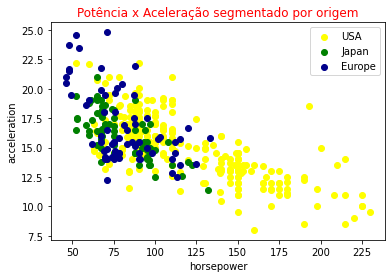

In [ ]:
#plotando o gráfico
fig , ax = plt.subplots()
ax.scatter(car_usa['horsepower'], car_usa['acceleration'], color = 'yellow', label = 'USA')
ax.scatter(car_japan['horsepower'], car_japan['acceleration'], color = 'green', label = 'Japan')
ax.scatter(car_europe['horsepower'], car_europe['acceleration'], color = 'darkblue', label = 'Europe')
ax.set_title('Potência x Aceleração segmentado por origem', c = 'r')
ax.set_xlabel('horsepower')
ax.set_ylabel('acceleration')
ax.legend();